In [85]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os 
from sklearn.cluster import KMeans
#print(os.getcwd())

file = "Big_Consulting_Firm_V2/Customer_Data.csv"

df = pd.read_csv(file).drop(columns="Unnamed: 0",axis=1) #Dropping column that gives no info

df.describe()

,Age,Annual Income,Total Spending
count,1598.000000,1596.000000,1600.000000
mean,37.895494,187.129699,2575.600781
std,16.226009,5004.797654,1453.083432
min,14.000000,-100.000000,-102.500000
25%,28.000000,39.000000,1383.750000
50%,35.000000,65.000000,2511.250000
75%,47.000000,81.000000,3843.750000
max,350.000000,200000.000000,5176.250000


In [86]:
df.isnull().sum()

Gender            0
Age               2
Annual Income     4
Total Spending    0
Interests         0
dtype: int64

In [87]:
df=df.dropna()
df.isnull().sum()

Gender            0
Age               0
Annual Income     0
Total Spending    0
Interests         0
dtype: int64

Histograms to see variation in each numeric variable
(There's got to be a better way to do this automatically, with automatic column-name-based titles)

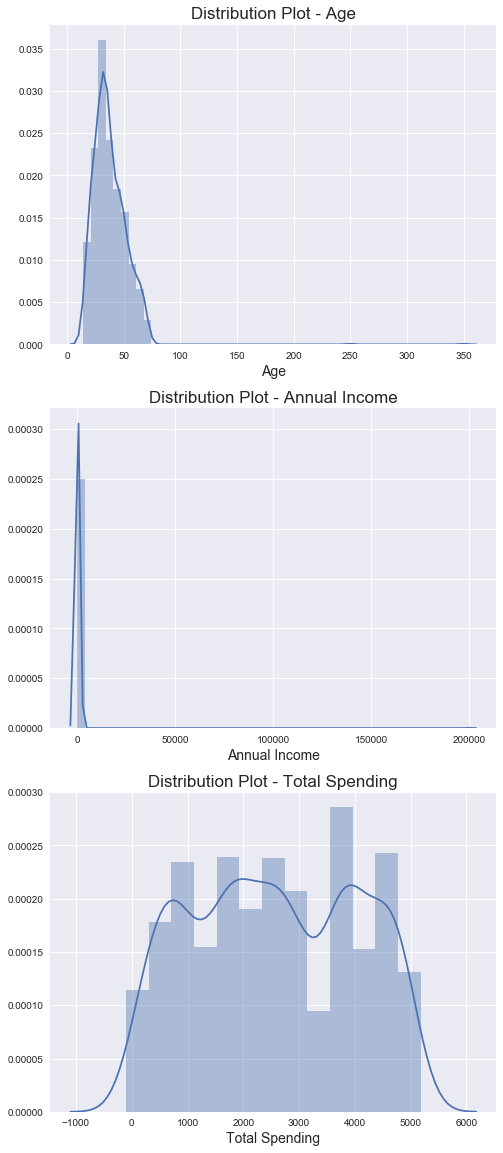

In [88]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

fig, ax = plt.subplots(len(list(df_num)), figsize=(8,20))

for i, col in enumerate(list(df_num)):
    sns.distplot(df[col], ax=ax[i])
    ax[i].set_title('Distribution Plot - {}'.format(col), fontsize=17)
    ax[i].set_xlabel(col, fontsize=14)

plt.show()
    


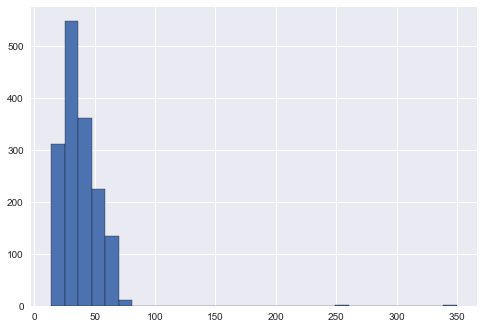

In [89]:
df.loc[:,'Age'].hist(bins = 30, edgecolor='black')

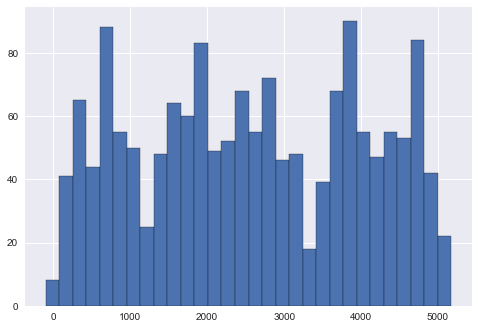

In [90]:
df.loc[:,'Total Spending'].hist(bins = 30, edgecolor='black')

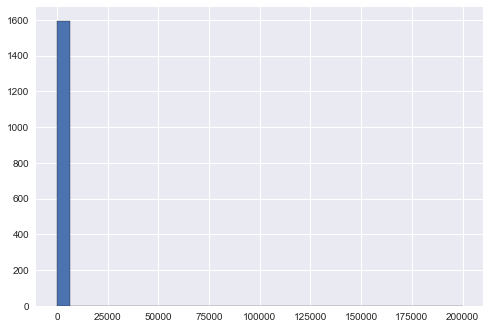

In [91]:
df.loc[:,'Annual Income'].hist(bins = 30, edgecolor='black')

Let's narrow our scope of income to get a better picture

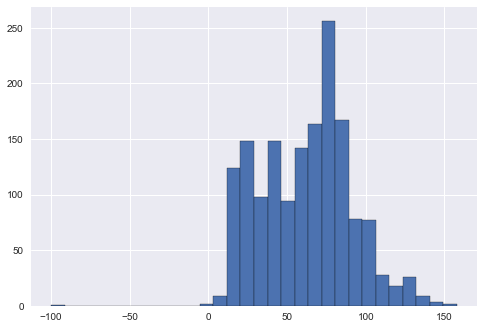

In [92]:
income_filter = df.loc[:, 'Annual Income'] <= 250
df.loc[income_filter,'Annual Income'].hist(bins = 30, edgecolor='black')

In [93]:
df.head()

,Gender,Age,Annual Income,Total Spending,Interests
0,male,22.0,16.0,512.50,Cooking
1,male,34.0,12.0,358.75,Exercise
2,male,64.0,13.0,153.75,Travel
3,male,70.0,13.0,717.50,Crafts
4,female,58.0,22.0,820.00,Travel


In [94]:
df.corr()

,Age,Annual Income,Total Spending
Age,1.000000,-0.015438,-0.318380
Annual Income,-0.015438,1.000000,0.025477
Total Spending,-0.318380,0.025477,1.000000


There's no correlation between age and annual income. Does the -.032 say that age and total spending have a slight negative relationship?  

In [95]:
df.nunique()

Gender              2
Age                62
Annual Income     141
Total Spending    104
Interests          19
dtype: int64

In [96]:
# Our style choices
#plt.style.available
plt.style.use('default')

Delete Outliers:  

In [97]:
#This ultimately gives less control over which outliers you're deleting; not good to use here because too many entires are deleted.  We don't in face want to delete outliers; we just want to delete the erroneous cases 

from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .01
    high = .99
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) 
               & (df[name] < quant_df.loc[high, name])]
    return df

#uncomment to remove outliers
#df = remove_outlier(df)

In [98]:
#df.nunique()

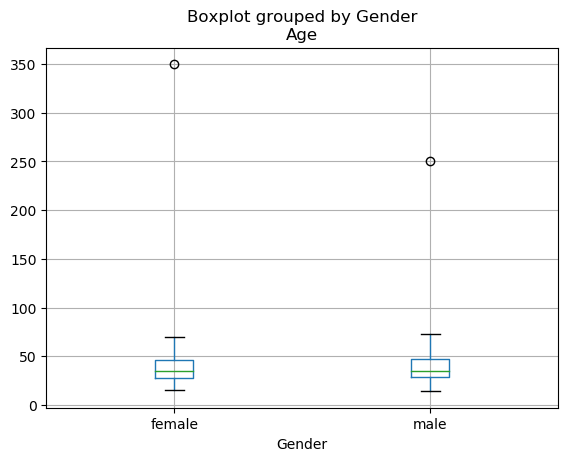

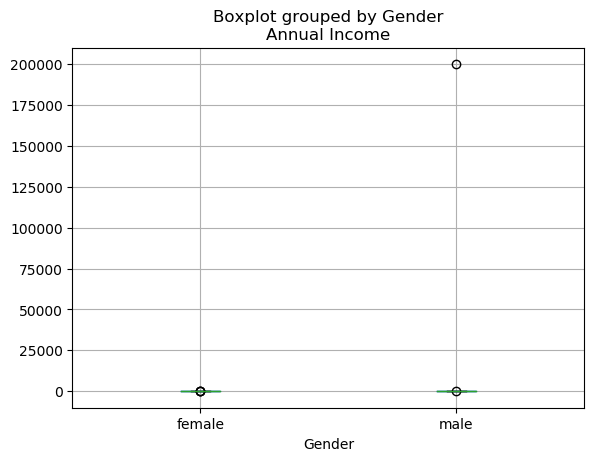

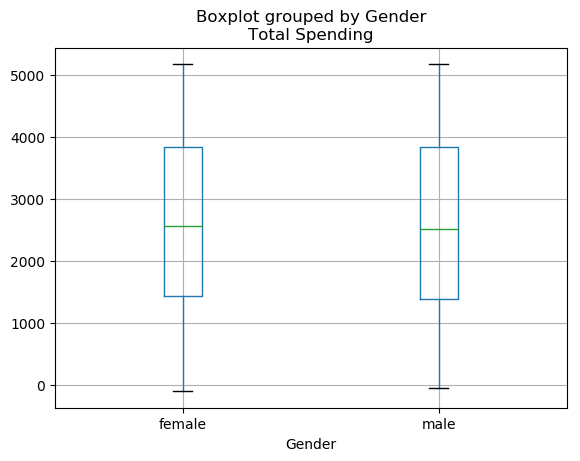

In [99]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
for i, col_val in enumerate(list(df_num)): #list(df) is a list of the column names of the df

    df.boxplot(col_val,by='Gender')
  # plt.title('');
   # plt.suptitle('');

Data Cleaning: getting rid of erroneous data 

In [100]:
df.sort_values(by=['Total Spending'])

,Gender,Age,Annual Income,Total Spending,Interests
22,female,30.0,78.0,-102.50,Strategic games
44,female,35.0,78.0,-51.25,Music
278,male,37.0,76.0,-51.25,Technology
42,female,37.0,82.0,-51.25,Travel
143,male,35.0,80.0,0.00,Automobiles
173,female,32.0,79.0,0.00,Hiking
88,male,32.0,79.0,51.25,Crafts
6,male,48.0,29.0,51.25,Travel
21,female,38.0,76.0,102.50,Camping
148,male,20.0,73.0,102.50,Exercise


In [101]:
# Get names of indexes for which column Total Spending has value 0 or less
indexNames = df[df['Total Spending'] <= 0 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.sort_values(by=['Total Spending']).head()

,Gender,Age,Annual Income,Total Spending,Interests
88,male,32.0,79.0,51.25,Crafts
6,male,48.0,29.0,51.25,Travel
134,male,33.0,78.0,102.50,Crafts
215,female,55.0,79.0,102.50,Exercise
95,male,60.0,35.0,102.50,Entertainment


In [102]:
df.sort_values(by=['Age'], ascending=False).head()

,Gender,Age,Annual Income,Total Spending,Interests
500,female,350.0,75.0,1845.00,Photography
5,male,250.0,21.0,820.00,Reading
883,male,73.0,60.0,2613.75,Camping
673,male,72.0,48.0,2665.00,Automobiles
860,male,71.0,47.0,2357.50,Art


In [103]:
df.sort_values(by=['Age']).head()

,Gender,Age,Annual Income,Total Spending,Interests
743,male,14.0,65.0,2511.25,Strategic games
1161,male,15.0,46.0,4715.00,Art
937,male,15.0,58.0,2408.75,Yoga
629,female,15.0,57.0,1947.50,Exercise
668,male,15.0,50.0,2767.50,Crafts


In [104]:
# Get names of indexes we want to delete
indexNames = df[df['Age'] >= 120 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.sort_values(by=['Age']).tail()

,Gender,Age,Annual Income,Total Spending,Interests
808,male,70.0,49.0,2818.75,Entertainment
860,male,71.0,47.0,2357.50,Art
106,male,71.0,24.0,871.25,Reading
673,male,72.0,48.0,2665.00,Automobiles
883,male,73.0,60.0,2613.75,Camping


In [105]:
df.sort_values(by=['Annual Income']).head()

,Gender,Age,Annual Income,Total Spending,Interests
940,female,58.0,-100.0,2408.75,Pets
1090,male,34.0,0.0,5022.50,Travel
1314,female,22.0,3.0,4868.75,Gardening
1277,female,24.0,4.0,4305.00,Music
1187,male,34.0,6.0,5176.25,Yoga


In [106]:
df.sort_values(by=['Annual Income']).tail()

,Gender,Age,Annual Income,Total Spending,Interests
33,male,33.0,142.0,871.25,Photography
1047,female,31.0,148.0,4202.50,Hiking
1119,female,29.0,152.0,4253.75,Travel
1143,male,32.0,158.0,4305.00,Travel
1430,male,28.0,200000.0,4048.75,Music


In [107]:
# Get names of indexes we want to delete
indexNames = df[(df['Annual Income'] < 0) | (df['Annual Income'] > 200)].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.sort_values(by=['Annual Income']).tail()

,Gender,Age,Annual Income,Total Spending,Interests
1295,male,29.0,142.0,4253.75,Strategic games
33,male,33.0,142.0,871.25,Photography
1047,female,31.0,148.0,4202.50,Hiking
1119,female,29.0,152.0,4253.75,Travel
1143,male,32.0,158.0,4305.00,Travel


In [108]:
df.sort_values(by=['Annual Income']).head()

,Gender,Age,Annual Income,Total Spending,Interests
1090,male,34.0,0.0,5022.50,Travel
1314,female,22.0,3.0,4868.75,Gardening
1277,female,24.0,4.0,4305.00,Music
1187,male,34.0,6.0,5176.25,Yoga
1229,male,17.0,7.0,4766.25,Entertainment


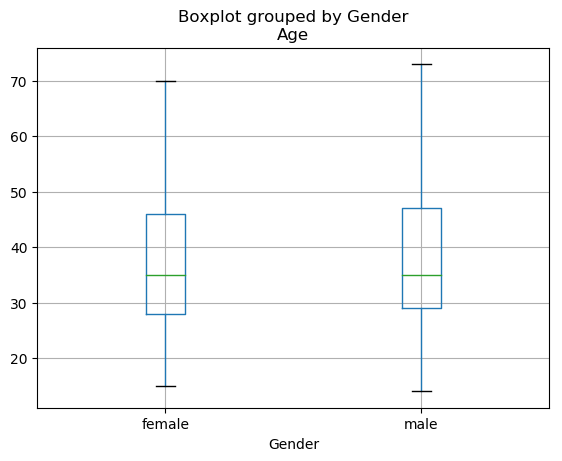

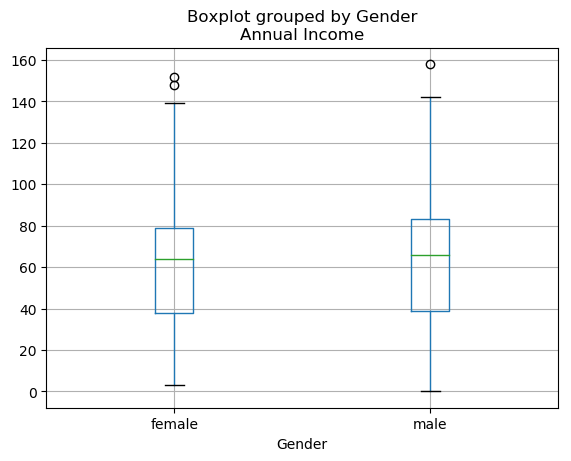

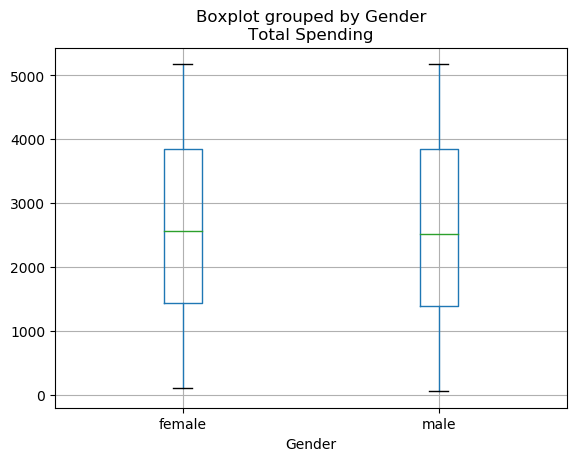

In [109]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
for i, col_val in enumerate(list(df_num)): #list(df) is a list of the column names of the df

    df.boxplot(col_val,by='Gender')
  # plt.title('');
   # plt.suptitle('');

Text(0.5, 1.0, 'Total Spending by Interest')

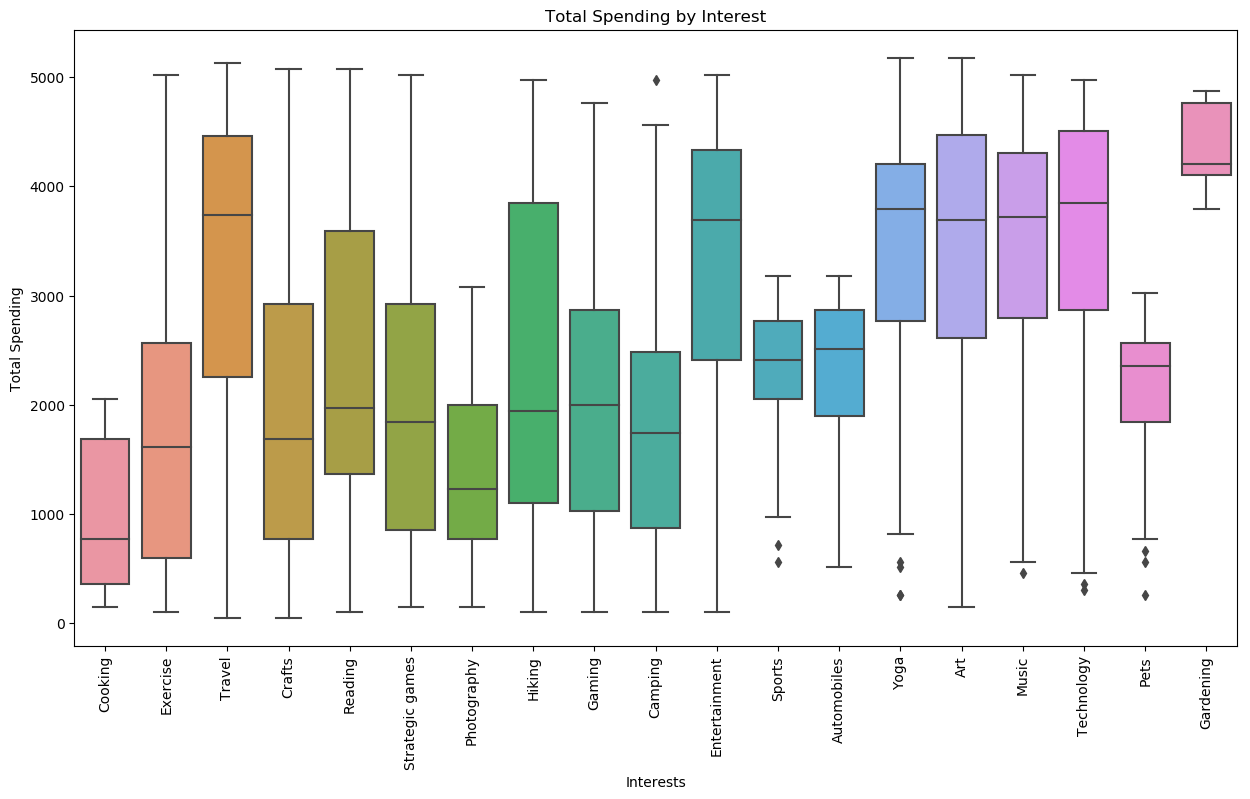

In [110]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='Interests',y='Total Spending',data=df)
plt.xticks(rotation=90)
plt.title('Total Spending by Interest')
#plt.figure(figsize = (30,15))

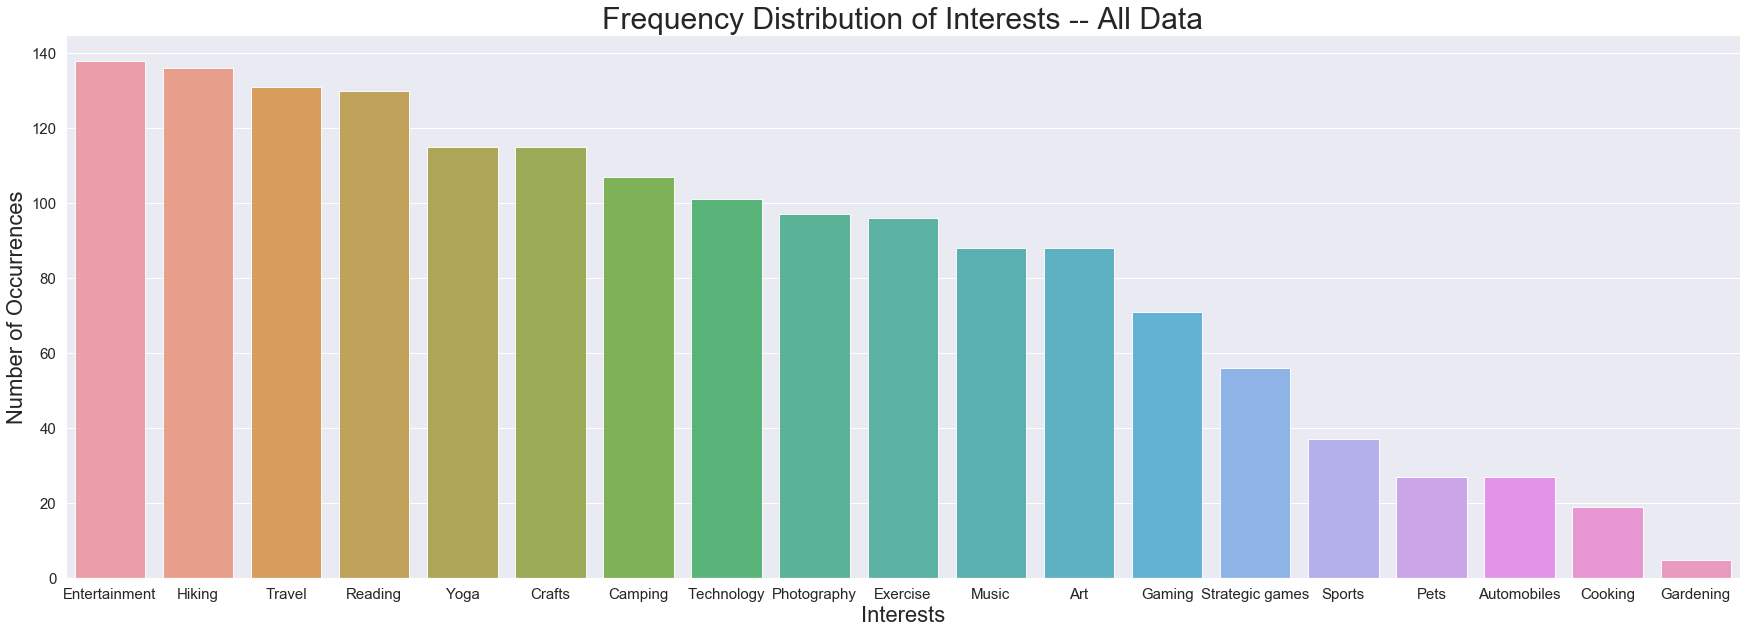

In [154]:
def interest_counts(cluster):
     subdf = df[df["label"] == i]
     return subdf['Interests'].value_counts()

def plot_interests(i):
    fig, ax1 = plt.subplots(figsize=(30,10))
    sns.set(style="darkgrid")
    if i=='all':
        interests_count = df['Interests'].value_counts()
        plt.title('Frequency Distribution of Interests -- All Data',size=30)
    else:
        interests_count = interest_counts(i)
        plt.title('Frequency Distribution of Interests in Cluster %3.0f' %i ,size=30)

    sns.barplot(interests_count.index, interests_count.values, alpha=0.9,ax=ax1)
    plt.ylabel('Number of Occurrences', fontsize=22)
    plt.yticks(size=15)
    plt.xlabel('Interests', fontsize=22)
    plt.xticks(size=15)
    plt.show()
    
plot_interests('all')

One hot Encoding:

In [111]:
df_with_dummies = pd.get_dummies(df, columns = ['Gender', 'Interests'])

In [112]:
dfd=df_with_dummies.copy()
dfd.head()

,Age,Annual Income,Total Spending,Gender_female,Gender_male,Interests_Art,Interests_Automobiles,Interests_Camping,Interests_Cooking,Interests_Crafts,...,Interests_Hiking,Interests_Music,Interests_Pets,Interests_Photography,Interests_Reading,Interests_Sports,Interests_Strategic games,Interests_Technology,Interests_Travel,Interests_Yoga
0,22.0,16.0,512.50,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,12.0,358.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64.0,13.0,153.75,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,70.0,13.0,717.50,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,58.0,22.0,820.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


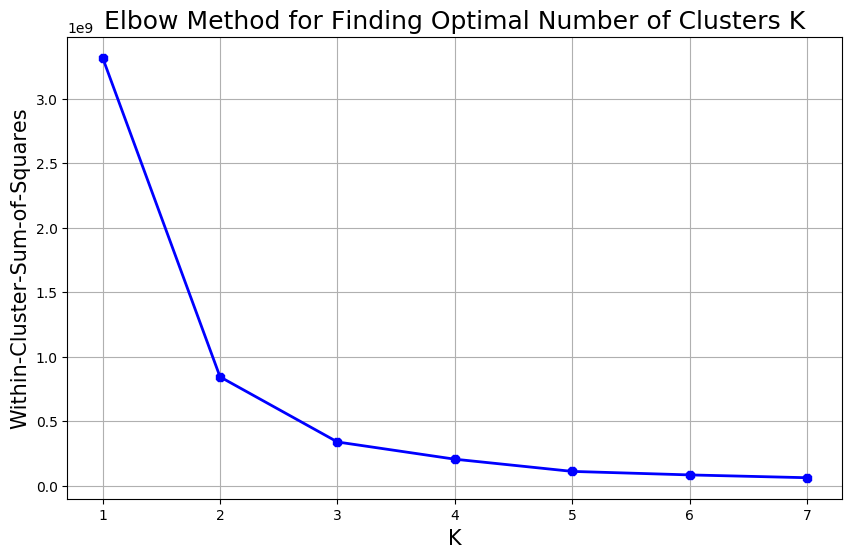

In [113]:
#We will arrive at the optimum number of clusters using the elbow method:
X = df_with_dummies.iloc[:,1:]
wcss = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))    
plt.grid()
plt.plot(range(1,8),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K",size=15)
plt.xticks(np.arange(1,8,1))
plt.ylabel("Within-Cluster-Sum-of-Squares",size=15)
plt.yticks(rotation=0)
plt.title("Elbow Method for Finding Optimal Number of Clusters K", size=18)
plt.show()

Let's proceed with 4 clusters 

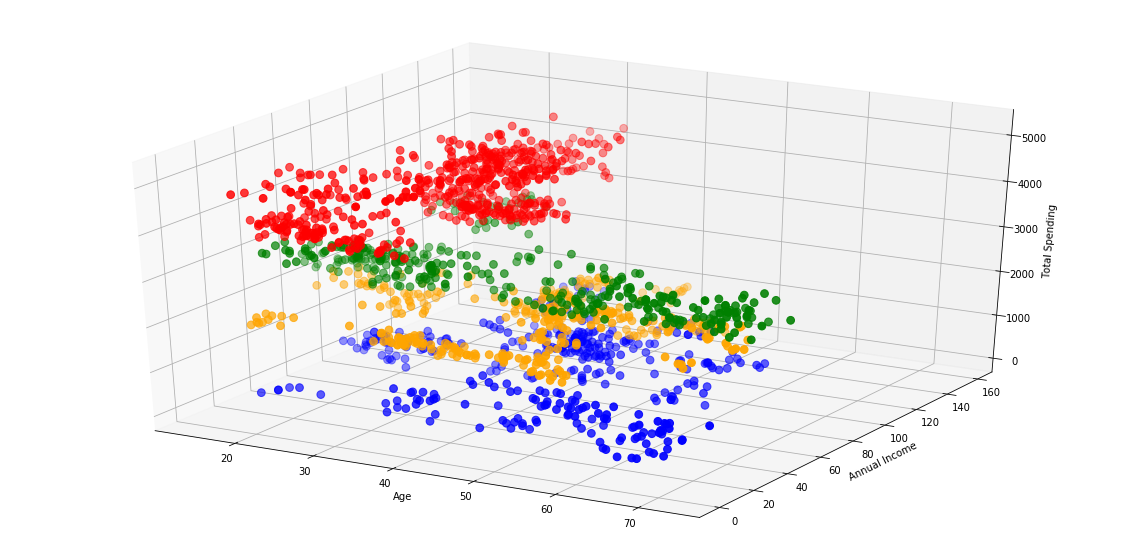

In [118]:
#Visualizing the clusters for k=4
km4 = KMeans(n_clusters=4)
clusters = km4.fit_predict(X)
df["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income"][df.label == 0], df["Total Spending"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income"][df.label == 1], df["Total Spending"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income"][df.label == 2], df["Total Spending"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income"][df.label == 3], df["Total Spending"][df.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Total Spending')
ax.view_init(30)
plt.show()


Cluster   0 Summary:
Feature Averages:
Age                42.82
Annual Income      67.12
Total Spending    630.88
label               0.00
Name: mean, dtype: float64

Most popular interest is: 
Photography
Majority gender is: 
female


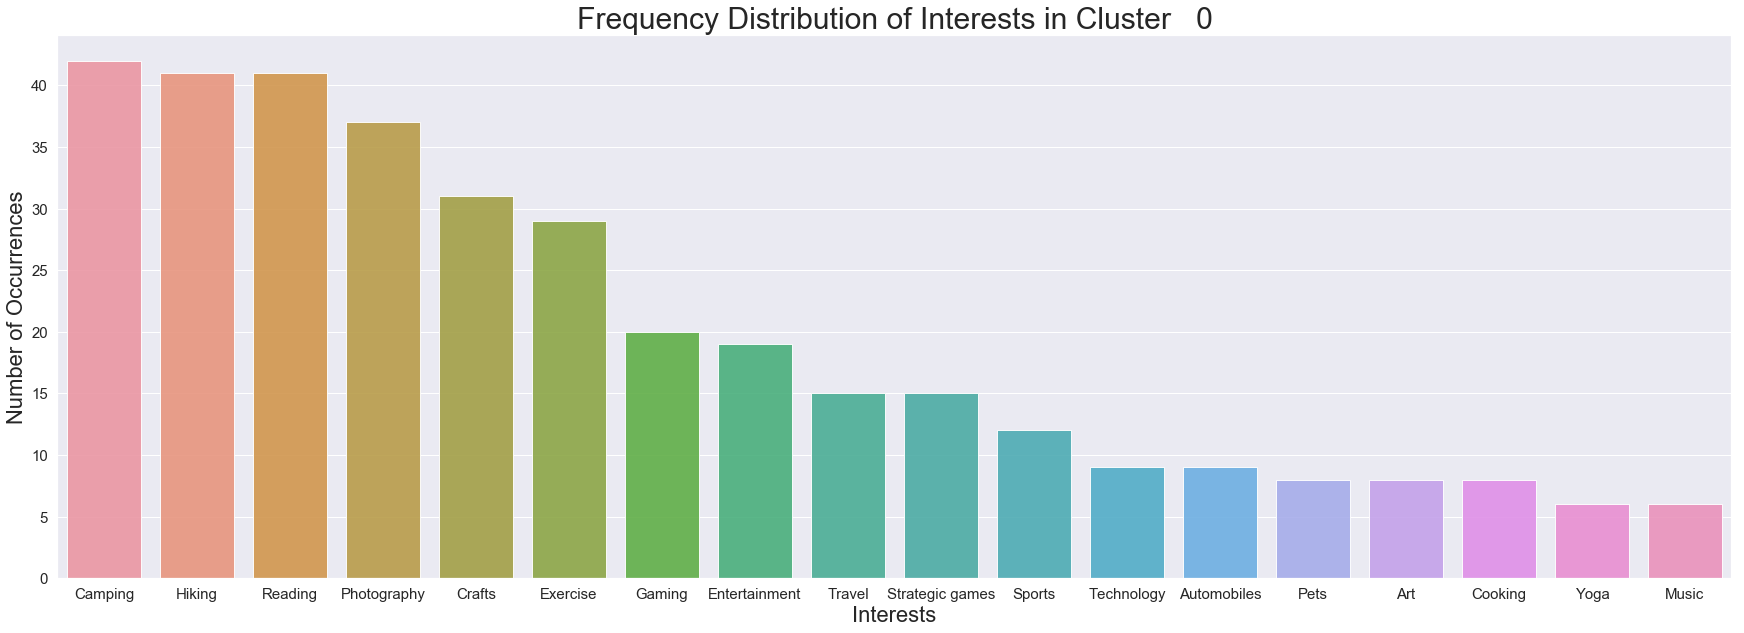

In [156]:
def cluster_summary(i):
    cluster = df[df["label"] == i]
    print("\nCluster %3.0f Summary:" %i)
    print('Feature Averages:')
    print(round(cluster.describe().loc['mean'],2))
    print("\nMost popular interest is: ")
    print(cluster['Interests'].value_counts().idxmax())
    print("Majority gender is: ")
    print(cluster['Gender'].value_counts().idxmax())
    plot_interests(i)
    
cluster_summary(0)


Cluster   1 Summary:
Feature Averages:
Age                 30.16
Annual Income       65.42
Total Spending    4281.38
label                1.00
Name: mean, dtype: float64

Most popular interest is: 
Entertainment
Majority gender is: 
female


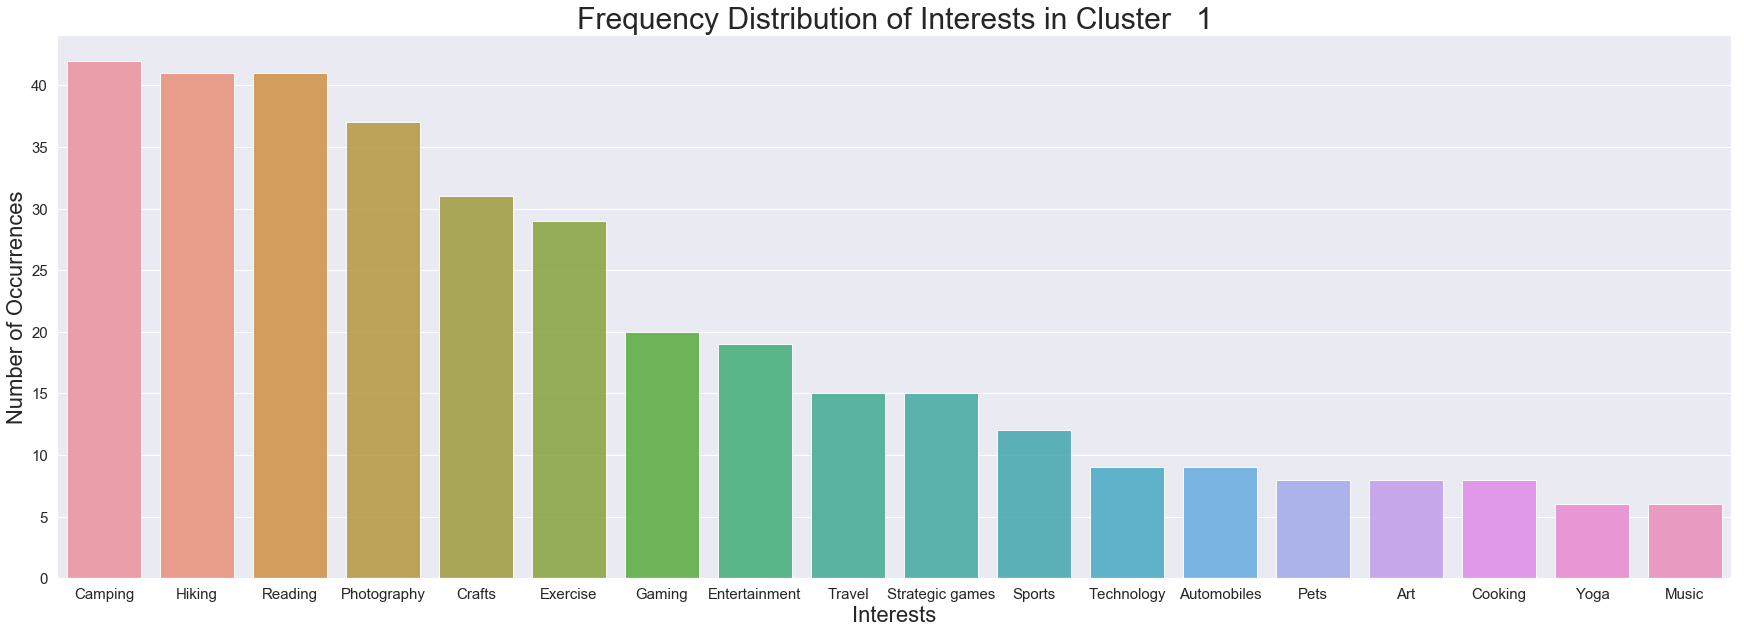

In [158]:
cluster_summary(1)


Cluster   2 Summary:
Feature Averages:
Age                 39.51
Annual Income       54.86
Total Spending    2839.22
label                2.00
Name: mean, dtype: float64

Most popular interest is: 
Yoga
Majority gender is: 
male


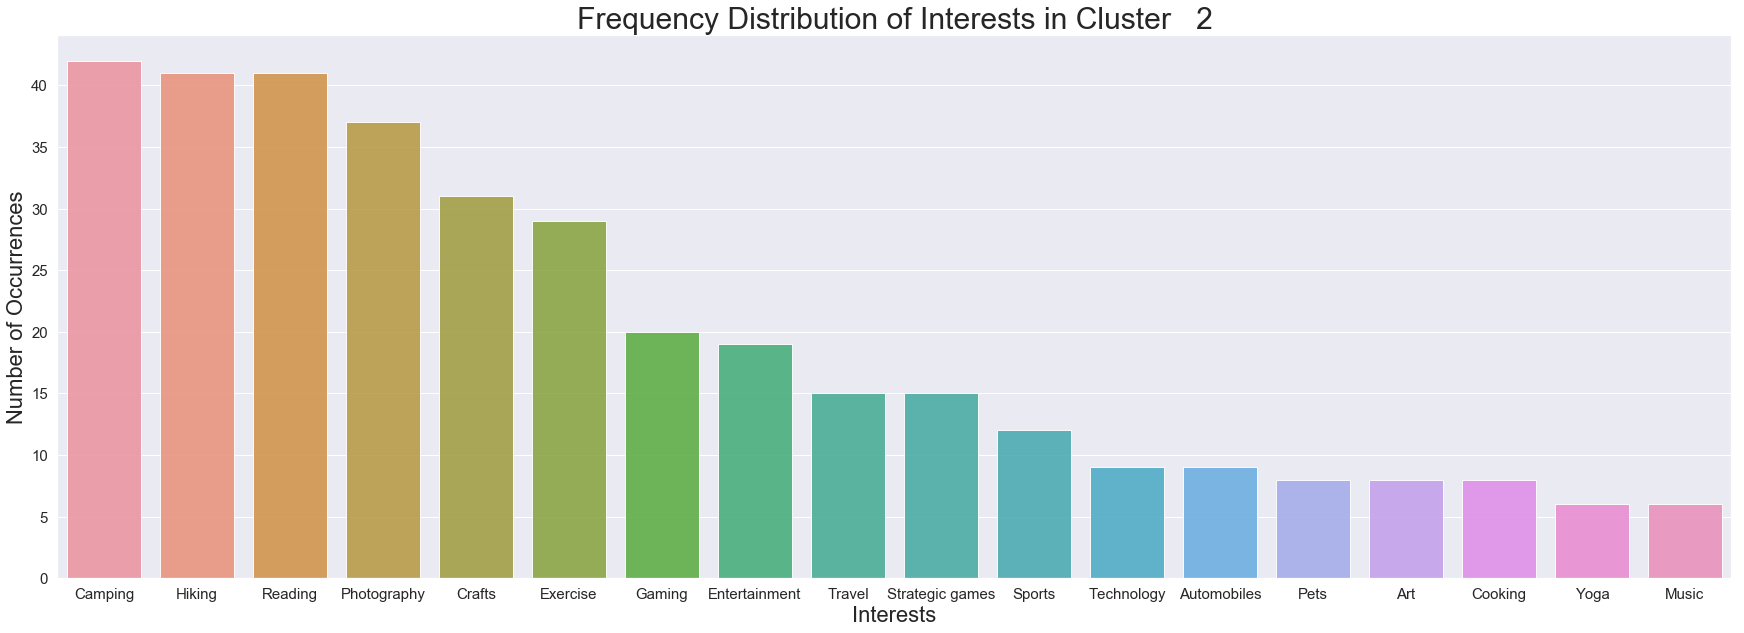

In [159]:
cluster_summary(2)


Cluster   3 Summary:
Feature Averages:
Age                 41.36
Annual Income       58.40
Total Spending    1793.03
label                3.00
Name: mean, dtype: float64

Most popular interest is: 
Camping
Majority gender is: 
female


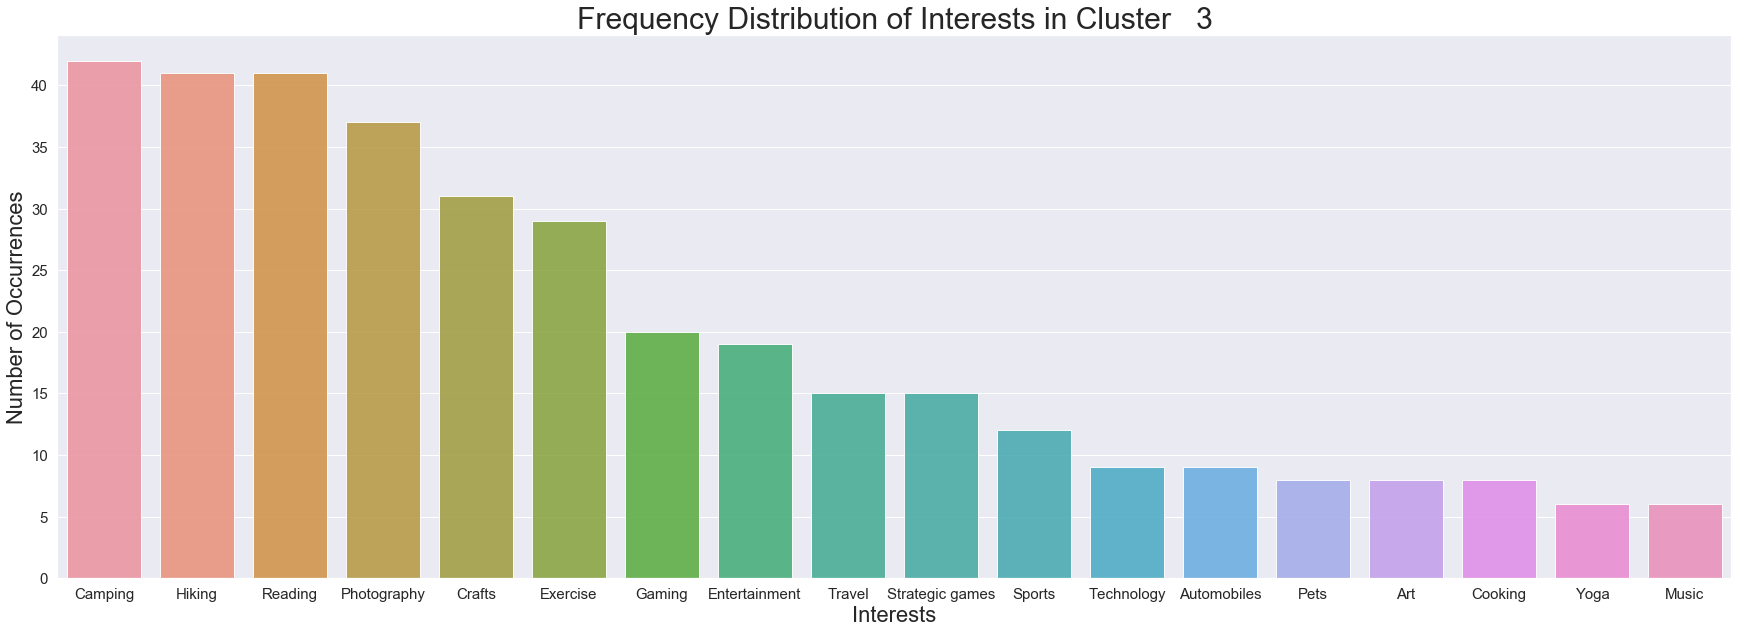

In [160]:
cluster_summary(3)